In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
# Load Part 1
data_part = np.load("D:\\amrita intern\\5 split data\\mnist_split_data_5\\mnist_part1.npz")
x_train = data_part['x_train']
y_train = data_part['y_train']
x_test = data_part['x_test']
y_test = data_part['y_test']

In [13]:
len(x_train)

11999

In [14]:
len(x_test)

2001

In [15]:
x_train.shape

(11999, 28, 28)

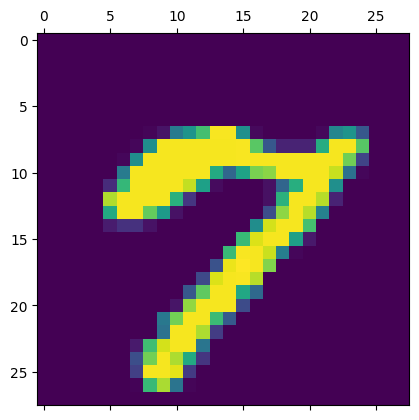

In [16]:
plt.matshow(x_train[4])

In [18]:
x_train = x_train / 255
x_test = x_test / 255

x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [75]:
# Improved Model with Multiple Hidden Layers and Optimizations
model = keras.Sequential([
    # First hidden layer - Feature extraction
    keras.layers.Dense(128, input_shape=(784,), activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    
    
    # Second hidden layer - Pattern recognition
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 
    
    
    # Third hidden layer - Feature refinement
    keras.layers.Dense(32, activation="relu"),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.2), 
    
    
    # Output layer - Classification
    keras.layers.Dense(10, activation="softmax")  # Changed to softmax for multi-class
])

# Compile with optimized parameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Optimized learning rate
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model architecture
model.summary()

# Train with improved parameters
history = model.fit(
    x_train_flatten, y_train,
    epochs=30,           # More epochs for better learning
    batch_size=64,      # Optimal batch size
    validation_split=0.1,
    verbose=1
)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3905 - loss: 1.7477 - val_accuracy: 0.0908 - val_loss: 2.3059
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7202 - loss: 0.9104 - val_accuracy: 0.0908 - val_loss: 2.2868
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7908 - loss: 0.6806 - val_accuracy: 0.1858 - val_loss: 3.2895
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8186 - loss: 0.5983 - val_accuracy: 0.1675 - val_loss: 3.1867
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8338 - loss: 0.5524 - val_accuracy: 0.7125 - val_loss: 0.8586
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8382 - loss: 0.5355 - val_accuracy: 0.8608 - val_loss: 0.4645
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8473 - loss: 0.4984 - val_accuracy: 0.8350 - val_loss: 0.4858
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8550 - loss: 0.4773 - val_accuracy: 0.

In [81]:
print("\nEvaluating the model on the combined test set...")
loss, accuracy = model.evaluate(x_test_flatten, y_test, verbose=2)

print("\n----------------------------------------------------")
print(f"🎯 Accuracy on Test set: {accuracy * 100:.2f}%")
print("----------------------------------------------------")


Evaluating the model on the combined test set...
63/63 - 0s - 3ms/step - accuracy: 0.9015 - loss: 0.3250

----------------------------------------------------
🎯 Accuracy on Test set: 90.15%
----------------------------------------------------


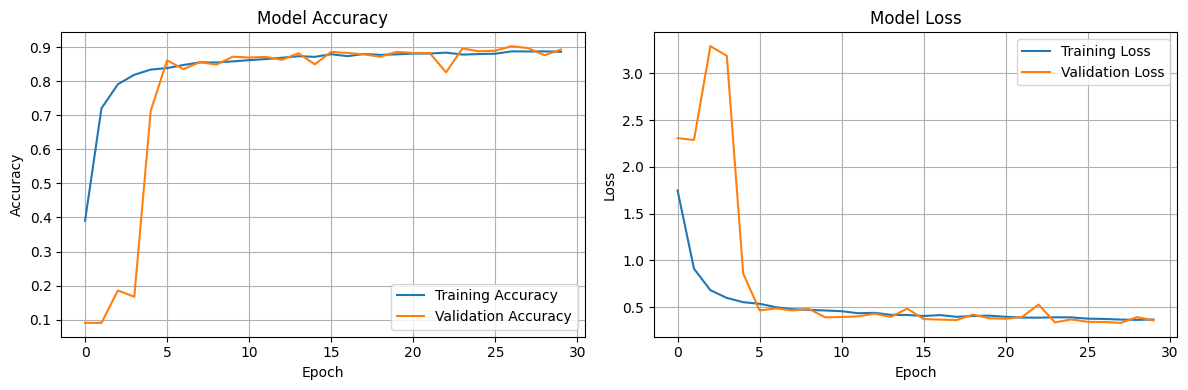

Final Training Accuracy: 88.59%
Final Validation Accuracy: 89.25%


In [77]:
# ...existing code...
# Plot training history to check for overfitting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
# ...existing code...

In [80]:
model.save('D:\\amrita intern\\5 split data\\saved_models\\mnist_model_v1.h5') 